# **Predicting Fuel Efficiency Using Multiple Linear Regression**

# Import Necessary Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


# Load Dataset

In [43]:
df=pd.read_csv('/content/cars.csv')
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


# Describing the Dataset

In [44]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


In [45]:
df.shape

(5076, 18)

In [46]:
df.ndim  # dimension of the dataset

2

In [47]:
df.dtypes

,0
Dimensions.Height,int64
Dimensions.Length,int64
Dimensions.Width,int64
Engine Information.Driveline,object
Engine Information.Engine Type,object
Engine Information.Hybrid,bool
Engine Information.Number of Forward Gears,int64
Engine Information.Transmission,object
Fuel Information.City mpg,int64
Fuel Information.Fuel Type,object


In [48]:
#list numerical variables
numerical_cols=df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width',
       'Engine Information.Number of Forward Gears',
       'Fuel Information.City mpg', 'Fuel Information.Highway mpg',
       'Identification.Year',
       'Engine Information.Engine Statistics.Horsepower',
       'Engine Information.Engine Statistics.Torque'],
      dtype='object')

In [49]:
#list categorical variable
categorical_variables=df.select_dtypes(include=['object']).columns
print(categorical_variables)

Index(['Engine Information.Driveline', 'Engine Information.Engine Type',
       'Engine Information.Transmission', 'Fuel Information.Fuel Type',
       'Identification.Classification', 'Identification.ID',
       'Identification.Make', 'Identification.Model Year'],
      dtype='object')


#Data Cleaning

In [50]:
df.isnull().sum()

,0
Dimensions.Height,0
Dimensions.Length,0
Dimensions.Width,0
Engine Information.Driveline,0
Engine Information.Engine Type,0
Engine Information.Hybrid,0
Engine Information.Number of Forward Gears,0
Engine Information.Transmission,0
Fuel Information.City mpg,0
Fuel Information.Fuel Type,0


In [51]:
print('Number of Duplicated row =',df.duplicated().sum())

Number of Duplicated row = 18


In [52]:
#Handling Duplicates
df.drop_duplicates(inplace=True)
print('Number of Duplicated row =',df.duplicated().sum())

Number of Duplicated row = 0


# Handle Outliers

In [53]:
# Check for outliers in numerical columns
for col in numerical_cols:
    # Example using IQR method for outlier detection
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(df.shape)

(4794, 18)


# Handle Categorical Variables

In [54]:
#Handle categorical variables
df.drop(['Identification.ID'],axis=1,inplace=True)

In [55]:
# Assuming the target variable is 'Fuel Information.City mpg'
target = 'Fuel Information.City mpg'

# Columns to target encode
target_encoding_cols = ['Identification.Make', 'Identification.Model Year', 'Engine Information.Engine Type','Engine Information.Driveline']

# Perform target encoding
for col in target_encoding_cols:
    # Calculate the mean target value for each category
    target_mean = df.groupby(col)[target].mean()
    # Map the mean to each category in the dataset
    df[col + '_encoded'] = df[col].map(target_mean)

# Display the first few rows to inspect the result
df[[col + '_encoded' for col in target_encoding_cols]].head()

,Identification.Make_encoded,Identification.Model Year_encoded,Engine Information.Engine Type_encoded,Engine Information.Driveline_encoded
0,17.431034,20.5,18.000000,16.998675
1,17.431034,20.5,21.166667,21.349902
2,17.431034,20.5,21.166667,21.349902
3,17.431034,20.5,21.166667,16.998675
5,17.431034,16.5,17.000000,16.998675


In [56]:
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,...,Identification.Classification,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Identification.Make_encoded,Identification.Model Year_encoded,Engine Information.Engine Type_encoded,Engine Information.Driveline_encoded
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,...,Automatic transmission,Audi,2009 Audi A3,2009,250,236,17.431034,20.5,18.000000,16.998675
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,...,Automatic transmission,Audi,2009 Audi A3,2009,200,207,17.431034,20.5,21.166667,21.349902
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,...,Manual transmission,Audi,2009 Audi A3,2009,200,207,17.431034,20.5,21.166667,21.349902
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,...,Automatic transmission,Audi,2009 Audi A3,2009,200,207,17.431034,20.5,21.166667,16.998675
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,...,Manual transmission,Audi,2009 Audi A5,2009,265,243,17.431034,16.5,17.000000,16.998675


In [57]:
df.drop(target_encoding_cols,axis=1,inplace=True)

In [58]:
df.shape

(4794, 17)

In [59]:
# Columns for One-Hot Encoding
one_hot_encoding_cols = [
    'Fuel Information.Fuel Type',
    'Engine Information.Transmission',
    'Identification.Classification'
]

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=one_hot_encoding_cols, drop_first=True)

df_encoded.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Engine Information.Transmission_4 Speed Automatic Select Shift,Engine Information.Transmission_5 Speed Automatic,Engine Information.Transmission_5 Speed Automatic Select Shift,Engine Information.Transmission_5 Speed Manual,Engine Information.Transmission_6 Speed Automatic,Engine Information.Transmission_6 Speed Automatic Select Shift,Engine Information.Transmission_6 Speed Manual,Engine Information.Transmission_7 Speed Automatic,Engine Information.Transmission_7 Speed Automatic Select Shift,Identification.Classification_Manual transmission
0,140,143,202,True,6,18,25,2009,250,236,...,False,False,False,False,False,True,False,False,False,False
1,140,143,202,True,6,22,28,2009,200,207,...,False,False,False,False,False,True,False,False,False,False
2,140,143,202,True,6,21,30,2009,200,207,...,False,False,False,False,False,False,True,False,False,True
3,140,143,202,True,6,21,28,2009,200,207,...,False,False,False,False,False,True,False,False,False,False
5,91,17,62,True,6,16,27,2009,265,243,...,False,False,False,False,False,False,True,False,False,True


# R² before feature selection

In [60]:
# Define target and features (X = all features, y = target variable)
X = df_encoded.drop(columns=["Fuel Information.City mpg"])
y = df_encoded["Fuel Information.City mpg"]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with all features
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

print(f"R² Score before feature selection: {r2:.4f}")

R² Score before feature selection: 0.9783


# Feature Scaling

In [61]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_encoded[df_encoded.select_dtypes(include=[np.number]).columns]=scaler.fit_transform(df_encoded[df.select_dtypes(include=[np.number]).columns])
df_encoded.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,...,Engine Information.Transmission_4 Speed Automatic Select Shift,Engine Information.Transmission_5 Speed Automatic,Engine Information.Transmission_5 Speed Automatic Select Shift,Engine Information.Transmission_5 Speed Manual,Engine Information.Transmission_6 Speed Automatic,Engine Information.Transmission_6 Speed Automatic Select Shift,Engine Information.Transmission_6 Speed Manual,Engine Information.Transmission_7 Speed Automatic,Engine Information.Transmission_7 Speed Automatic Select Shift,Identification.Classification_Manual transmission
0,0.545455,0.557312,0.794466,True,0.666667,0.476190,0.482759,0.0,0.3750,0.318707,...,False,False,False,False,False,True,False,False,False,False
1,0.545455,0.557312,0.794466,True,0.666667,0.666667,0.586207,0.0,0.2500,0.251732,...,False,False,False,False,False,True,False,False,False,False
2,0.545455,0.557312,0.794466,True,0.666667,0.619048,0.655172,0.0,0.2500,0.251732,...,False,False,False,False,False,False,True,False,False,True
3,0.545455,0.557312,0.794466,True,0.666667,0.619048,0.586207,0.0,0.2500,0.251732,...,False,False,False,False,False,True,False,False,False,False
5,0.351779,0.059289,0.241107,True,0.666667,0.380952,0.551724,0.0,0.4125,0.334873,...,False,False,False,False,False,False,True,False,False,True


In [62]:
df_encoded.dtypes

,0
Dimensions.Height,float64
Dimensions.Length,float64
Dimensions.Width,float64
Engine Information.Hybrid,bool
Engine Information.Number of Forward Gears,float64
Fuel Information.City mpg,float64
Fuel Information.Highway mpg,float64
Identification.Year,float64
Engine Information.Engine Statistics.Horsepower,float64
Engine Information.Engine Statistics.Torque,float64


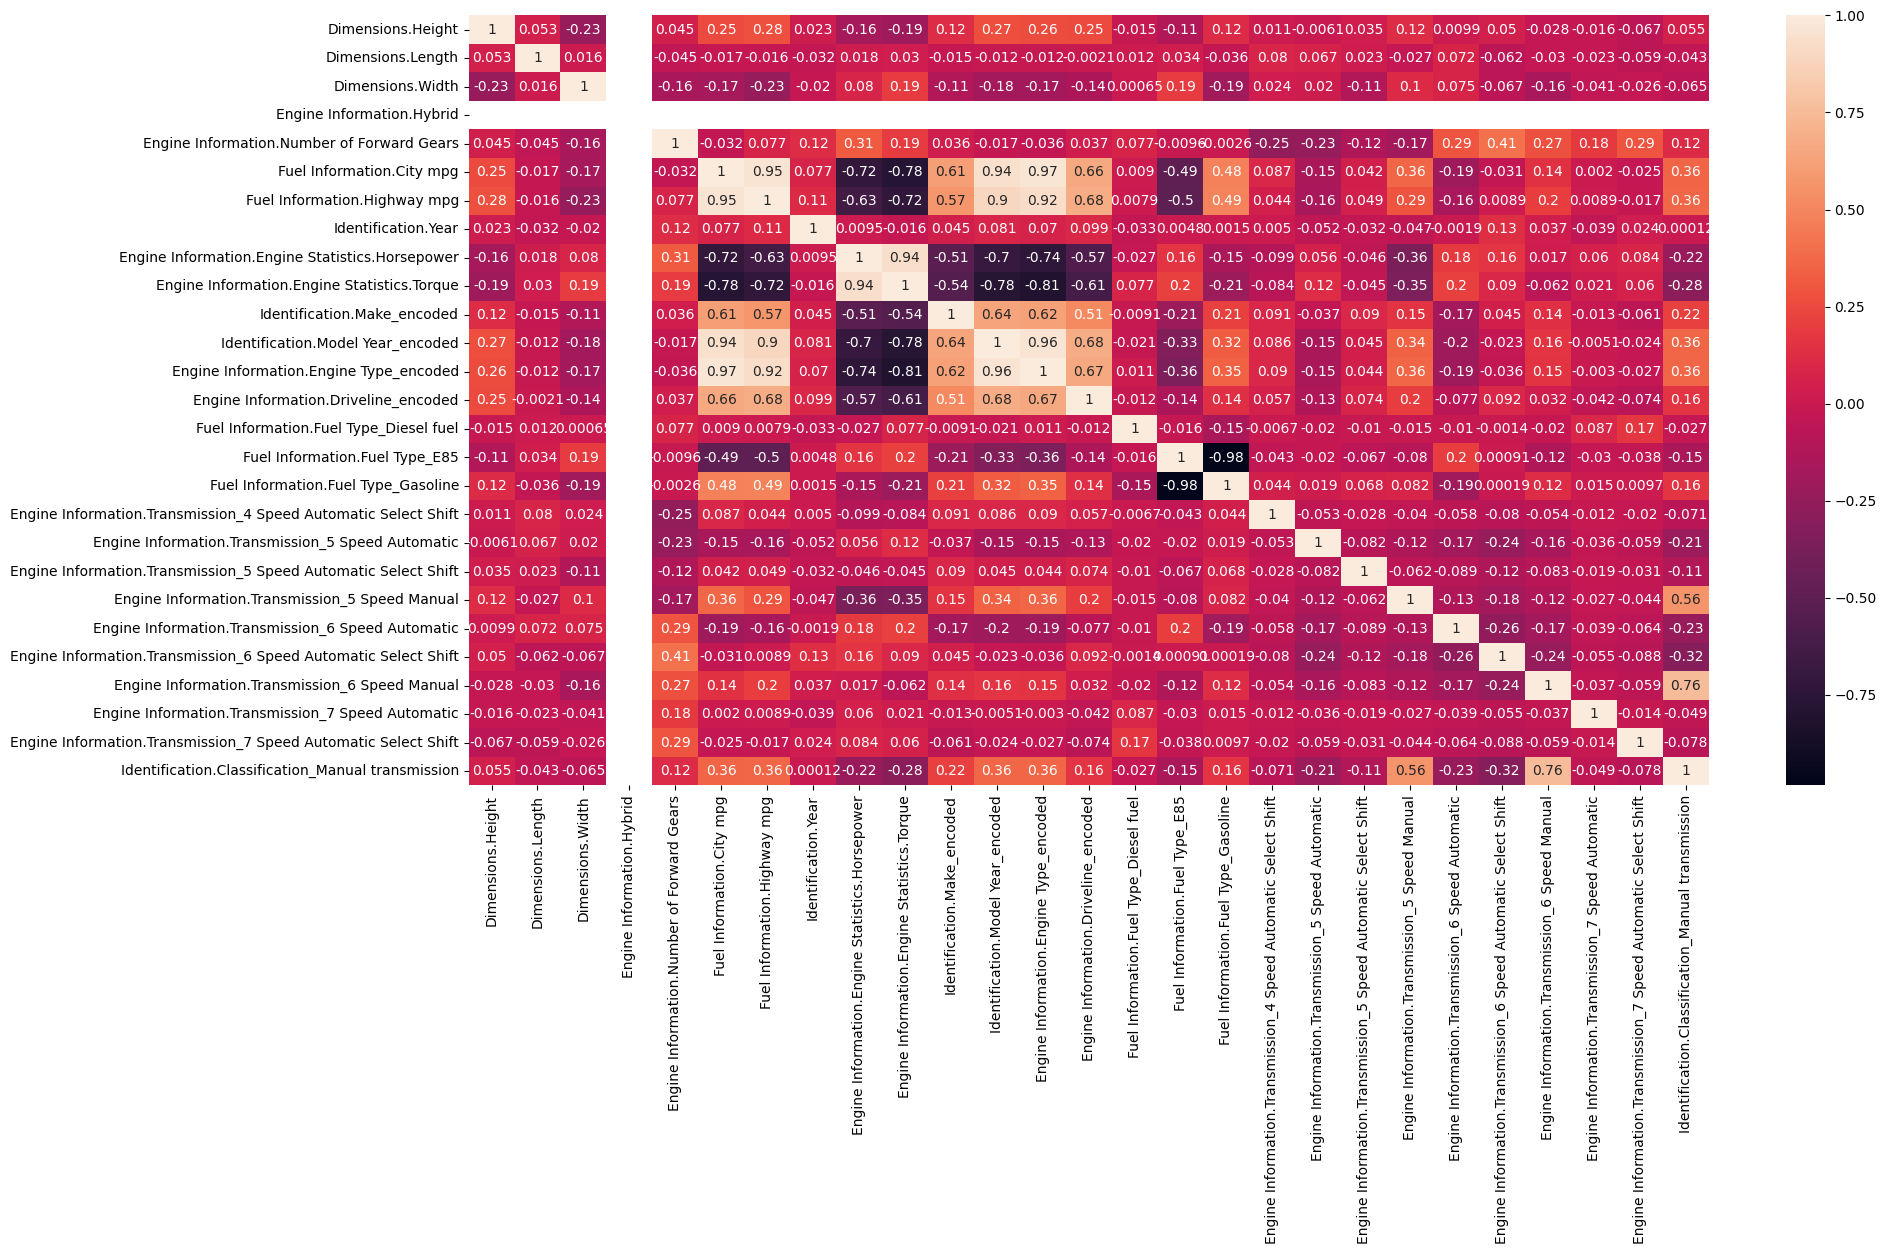

In [63]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_encoded.corr(),annot=True)
plt.show()

# Feature Selection Using RFE

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

X = df_encoded.drop('Fuel Information.City mpg', axis=1)
y = df_encoded['Fuel Information.City mpg']

ridge = Ridge()
rfe = RFE(ridge, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: Index(['Fuel Information.Highway mpg',
       'Engine Information.Engine Statistics.Horsepower',
       'Identification.Model Year_encoded',
       'Engine Information.Engine Type_encoded',
       'Fuel Information.Fuel Type_E85'],
      dtype='object')


In [65]:
#convert boolean column to numeric
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Linearity

<Axes: xlabel='Engine Information.Engine Statistics.Horsepower', ylabel='Fuel Information.City mpg'>

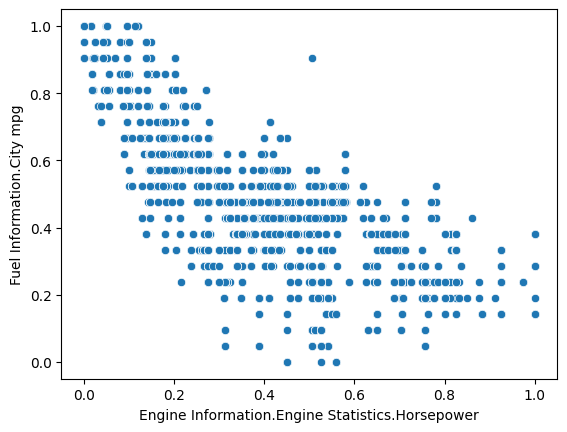

In [66]:
#scatterplot for linear realtionship
sns.scatterplot(x='Engine Information.Engine Statistics.Horsepower',y='Fuel Information.City mpg',data=df_encoded)

<Axes: xlabel='Fuel Information.Highway mpg', ylabel='Fuel Information.City mpg'>

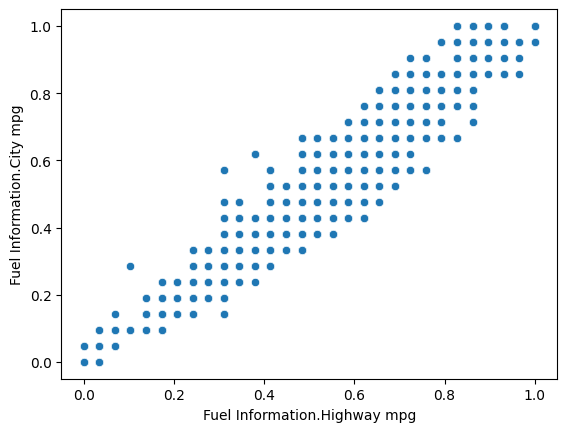

In [67]:
sns.scatterplot(x='Fuel Information.Highway mpg',y='Fuel Information.City mpg',data=df_encoded)

<Axes: xlabel='Identification.Model Year_encoded', ylabel='Fuel Information.City mpg'>

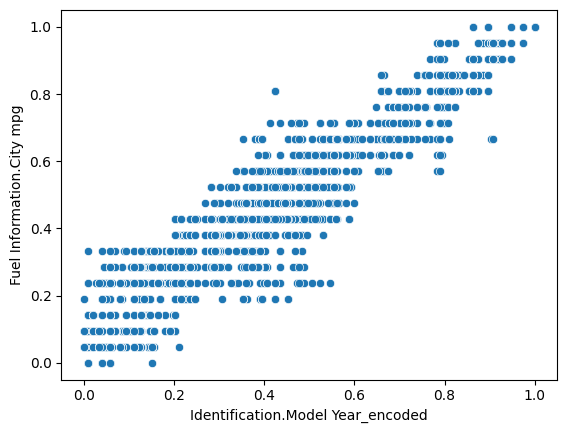

In [68]:
sns.scatterplot(x='Identification.Model Year_encoded',y='Fuel Information.City mpg',data=df_encoded)

<Axes: xlabel='Engine Information.Engine Type_encoded', ylabel='Fuel Information.City mpg'>

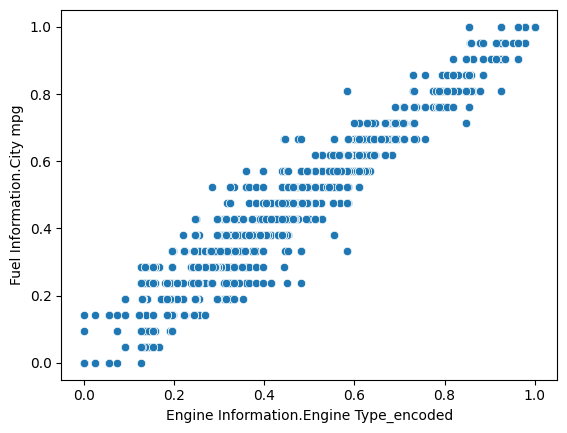

In [69]:
sns.scatterplot(x='Engine Information.Engine Type_encoded',y='Fuel Information.City mpg',data=df_encoded)

<Axes: xlabel='Fuel Information.Fuel Type_E85', ylabel='Fuel Information.City mpg'>

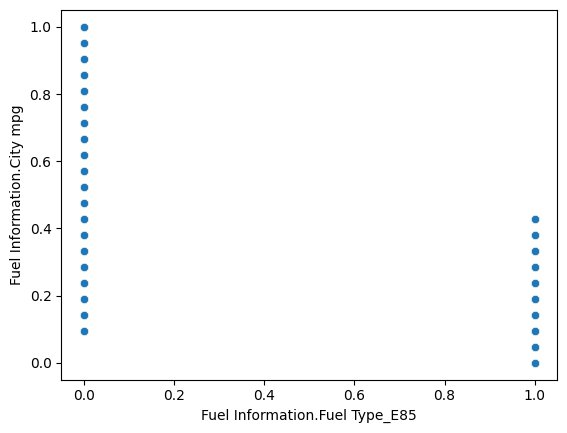

In [70]:
sns.scatterplot(x='Fuel Information.Fuel Type_E85',y='Fuel Information.City mpg',data=df_encoded)

# Multicolinearity

In [71]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
selected_features = ['Fuel Information.Highway mpg',
       'Engine Information.Engine Statistics.Horsepower',
       'Identification.Model Year_encoded',
       'Engine Information.Engine Type_encoded',
       'Fuel Information.Fuel Type_E85']

X = df_encoded[selected_features]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                           Feature        VIF
0                     Fuel Information.Highway mpg  55.364619
1  Engine Information.Engine Statistics.Horsepower   2.984179
2                Identification.Model Year_encoded  53.683789
3           Engine Information.Engine Type_encoded  93.409820
4                   Fuel Information.Fuel Type_E85   1.432634


In [72]:
from sklearn.decomposition import PCA
# Extract features with high VIF
high_vif_features = ['Fuel Information.Highway mpg', 'Identification.Model Year_encoded','Engine Information.Engine Type_encoded']


# Apply PCA
pca = PCA(n_components=1)  # Reduce to a single component
X_pca = pca.fit_transform(df_encoded[high_vif_features])

# Create a new column in the DataFrame for the PCA component
df_encoded['PCA_Fuel_ModelYear'] = X_pca

# Drop the original correlated features
df_encoded = df_encoded.drop(columns=high_vif_features)

print("Transformed DataFrame with PCA feature added:")
df_encoded.head()

Transformed DataFrame with PCA feature added:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,Identification.Make_encoded,...,Engine Information.Transmission_5 Speed Automatic,Engine Information.Transmission_5 Speed Automatic Select Shift,Engine Information.Transmission_5 Speed Manual,Engine Information.Transmission_6 Speed Automatic,Engine Information.Transmission_6 Speed Automatic Select Shift,Engine Information.Transmission_6 Speed Manual,Engine Information.Transmission_7 Speed Automatic,Engine Information.Transmission_7 Speed Automatic Select Shift,Identification.Classification_Manual transmission,PCA_Fuel_ModelYear
0,0.545455,0.557312,0.794466,1,0.666667,0.476190,0.0,0.3750,0.318707,0.424175,...,0,0,0,0,1,0,0,0,0,0.137446
1,0.545455,0.557312,0.794466,1,0.666667,0.666667,0.0,0.2500,0.251732,0.424175,...,0,0,0,0,1,0,0,0,0,0.283971
2,0.545455,0.557312,0.794466,1,0.666667,0.619048,0.0,0.2500,0.251732,0.424175,...,0,0,0,0,0,1,0,0,1,0.321753
3,0.545455,0.557312,0.794466,1,0.666667,0.619048,0.0,0.2500,0.251732,0.424175,...,0,0,0,0,1,0,0,0,0,0.283971
5,0.351779,0.059289,0.241107,1,0.666667,0.380952,0.0,0.4125,0.334873,0.424175,...,0,0,0,0,0,1,0,0,1,0.021097


In [77]:


# VIF after PCA on selected features
X = df_encoded[['Engine Information.Engine Statistics.Horsepower', 'Fuel Information.Fuel Type_E85', 'PCA_Fuel_ModelYear']]

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,Engine Information.Engine Statistics.Horsepower,1.190180
1,Fuel Information.Fuel Type_E85,1.245670
2,PCA_Fuel_ModelYear,1.228031


# Model Training

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3835, 3), (959, 3), (3835,), (959,))

In [79]:
#multiple linear regression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 6.91797812e-01,  2.69799866e-01,  4.94022272e-01,  1.88487908e-01,
        3.97673127e-01,  4.23068758e-01,  2.14955294e-01,  1.65229034e-01,
        5.32522985e-01,  3.13172924e-01,  2.51365915e-01,  4.21858977e-01,
        5.79380164e-01,  2.28208395e-01,  3.67341100e-01,  8.71087266e-01,
        3.49775592e-01,  4.90615433e-01,  7.95455176e-01,  4.74354068e-01,
        5.40461247e-01,  3.25778180e-01,  4.59409564e-01,  2.04770716e-01,
        4.63682235e-01,  7.27747195e-01,  4.79197973e-01,  2.81554058e-01,
        5.22996648e-01,  7.30983345e-01,  4.71717252e-01,  3.83497571e-01,
        6.02575408e-01,  1.78411105e-01,  5.83975216e-02,  8.28594254e-01,
        4.73242383e-01,  5.71727857e-01,  3.68560777e-01,  8.35839441e-01,
        3.10410228e-01,  6.48374623e-01,  5.51565862e-01,  8.00793724e-01,
        4.18216475e-01,  2.23089026e-01,  5.73307568e-01,  2.41438441e-01,
        2.11457568e-01,  3.65015341e-01,  5.91161391e-01,  2.07561406e-01,
        3.35866288e-01,  

# Model Evaluation

In [80]:
#R-Squared Evaluation
r2_score(y_test,y_pred)

0.9731558788902169

In [82]:
err=y_test-y_pred
err

,Fuel Information.City mpg
644,-0.072750
998,-0.031705
1825,-0.017832
796,-0.045631
2021,-0.016721
...,...
2007,-0.007922
4513,-0.001893
734,0.058873
2471,0.001994


# Distribution

<ipython-input-86-ff8746efdf45>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(err,color='blue')


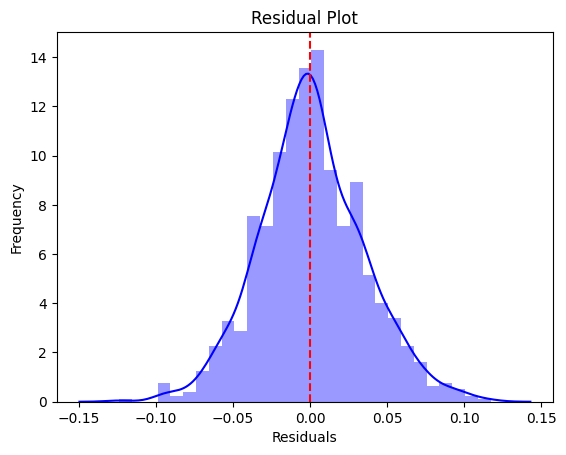

In [86]:
#Residual Plot
sns.distplot(err,color='blue')
plt.axvline(x=0,color='r',linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Plot')
plt.show()

# Homoscedasticity

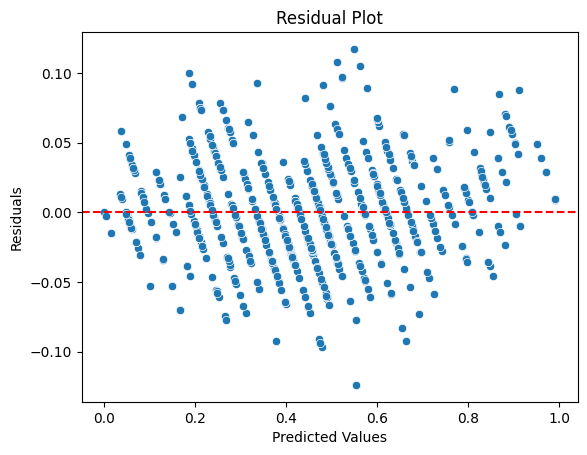

In [84]:
sns.scatterplot(x=y_pred,y=err)
plt.axhline(y=0,color='r',linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()